# In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [32]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x= df.loc[:,features].values
y= df.loc[:,['target']]

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDF.head()

,principal component 1,principal component 2,principal component 3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230


In [35]:
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
finalDF.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


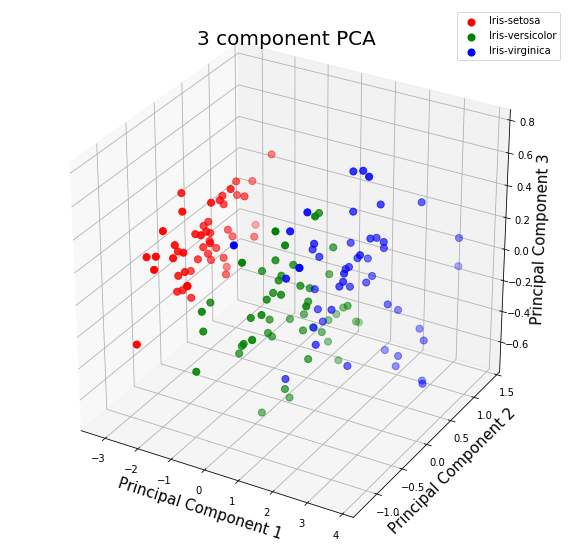

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDF['target'] == target
    
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , finalDF.loc[indicesToKeep, 'principal component 3']
              , c = color
              , s = 50)
    
ax.legend(targets)
ax.grid()
plt.show()
